In [242]:
import simplejson as json 
import xml.etree.ElementTree as ET
import pandas as pd
from IPython.display import display, HTML

tree = ET.parse('/home/ubuntu/Documents/health/apple_health_export/export.xml')
root = tree.getroot() 

data = []
 

In [243]:
for elem in root:
    if elem.tag == "Record":
        d = elem.attrib
        r = {
            'type' : d['type'],
            'value' : d['value'],
            'date' : d['startDate']
            }
        data.append(r)
        

In [ ]:
for t in types:
    print(t + '\n')
 


In [244]:
df = pd.DataFrame(data=data)
df['value'] = pd.to_numeric(df['value'])

In [246]:
cols = ["HKQuantityTypeIdentifierBloodPressureSystolic", 
        "HKQuantityTypeIdentifierBloodGlucose", "HKQuantityTypeIdentifierBloodPressureDiastolic"]
data = {}
for i in cols:
    d = df.loc[df['type'] == i]
    data[i] = d.sort_values(by='date', axis=0)



In [247]:
bloodPressure = pd.merge(data["HKQuantityTypeIdentifierBloodPressureSystolic"],data["HKQuantityTypeIdentifierBloodPressureDiastolic"],on="date")
bloodPressure.drop(["type_x", "type_y"],axis=1, inplace=True)
bloodPressure.rename(columns={'value_x': 'Systolic', 'value_y': 'Diastolic'}, inplace=True)
display(HTML(bloodPressure.to_html()))


,date,Systolic,Diastolic
0,2019-11-13 16:24:00 +0200,126.0,74.0
1,2019-11-15 16:24:00 +0200,104.0,78.0
2,2019-11-23 02:11:00 +0200,110.0,67.0
3,2019-11-26 17:02:00 +0200,123.0,92.0
4,2019-11-27 04:56:00 +0200,121.0,70.0
5,2019-12-19 09:06:00 +0200,135.0,90.0
6,2019-12-19 21:18:00 +0200,129.0,67.0
7,2019-12-20 16:17:00 +0200,123.0,68.0
8,2019-12-21 21:48:00 +0200,102.0,75.0
9,2019-12-21 21:53:00 +0200,151.0,76.0


In [ ]:
 bloodPressure.columns

In [ ]:
df.columns

In [249]:
bloodPressure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 0 to 14
Data columns (total 3 columns):
date         15 non-null object
Systolic     15 non-null float64
Diastolic    15 non-null float64
dtypes: float64(2), object(1)
memory usage: 480.0+ bytes


In [ ]:
for k, v in data.items():
    display(HTML(v.to_html()))


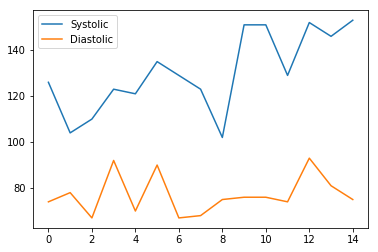

In [250]:
bloodPressure.plot()

In [ ]:
import numpy as np 
from matplotlib import pyplot as plt 

 
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x=BloodPressureSystolic['date'],y=BloodPressureSystolic['value']) 
plt.show()

In [ ]:
from plotly.offline import plot

import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Scatter(x=BloodPressureSystolic['date'],y=BloodPressureSystolic['value'])],
    layout_title_text="BloodPressureSystolic"
)
fig.show()

In [ ]:
d = df.loc[df['type'] == "HKQuantityTypeIdentifierBloodGlucose"]
BloodGlucose = d.sort_values(by='date', axis=0)           

In [ ]:
from plotly.offline import plot

import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Scatter(x=BloodGlucose['date'],y=BloodGlucose['value'])],
    layout_title_text="BloodGlucose"
)
fig.show()